# Imports

In [22]:
import matplotlib.pyplot as plt

from data_loader import DataLoader

plt.style.use('bmh')

# Load Data

In [23]:
df = DataLoader().create_dataframe(remove_duplicates=True, preprocess=True)
df.head()

100%|██████████| 239073/239073 [00:35<00:00, 6764.40it/s]


,phrase_id,phrase,phrase_clean,sentiment_val,label_id,label
69650,72419,a skyscraper,skyscrap,0.61111,4.0,Positive
62909,3598,a bolly-holly masala,bolli holli masala,0.41667,3.0,Neutral
115153,120298,focuses too much on Max when he should be fill...,focus much max fill screen tortur dull artist ...,0.31944,2.0,Negative
128282,32640,honestly nice,honestli nice,0.80556,5.0,Very positive
66944,190895,a lower I . Q,lower q,0.30556,2.0,Negative


# Helper functions

In [75]:
def plot_text_length(text, title):
    lens = text.str.split().apply(lambda x:  len(x))
    print(lens.describe())
    
    fig, ax = plt.subplots(figsize = (10,6))
    lens.plot(kind='hist', density=True, bins=15, alpha=0.65)
    lens.plot(kind='kde')
    ax.set_xlabel("Phrase length")
    ax.set_ylabel("Density")
    ax.set_xlim(-2, 30)
    ax.set_title(title)
    ax.tick_params(left = False, bottom = False)

    for ax, spine in ax.spines.items():
        spine.set_visible(False)
    
    plt.show()
    
def plot_stats(stats, xlabel, ylabel, title, save_fig=False):
    fig, ax = plt.subplots(figsize = (10,6))
    
    ax = stats.mean().plot(kind='bar', alpha=0.65)
    ax = stats.median().plot(kind='bar', alpha=0.65, color='red')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.tick_params(left = False, bottom = False)
    
    for ax, spine in ax.spines.items():
            spine.set_visible(False)
            
    plt.legend(['Mean', 'Median'])
    
    if save_fig:
        plt.savefig('mean_med', dpi=300)

# Label Class Balance

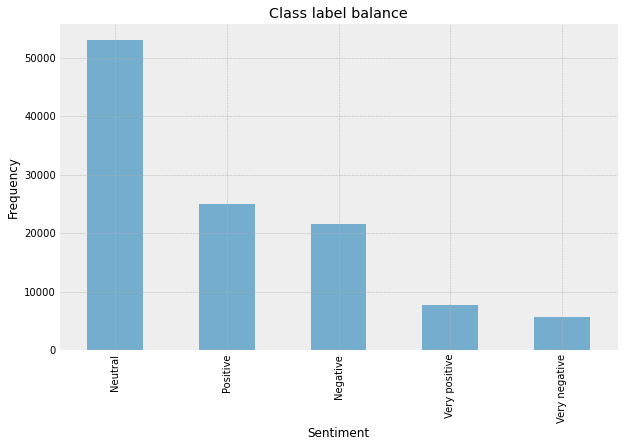

In [69]:
fig, ax = plt.subplots(figsize = (10,6))
ax = df['label'].sort_values(ascending=False).value_counts().plot(kind='bar', alpha=0.65)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Class label balance')
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
        spine.set_visible(False)

# plt.savefig('label_balance', dpi=300)

# Phrase Length Distribution

count    113024.000000
mean          4.693437
std           3.816925
min           1.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          30.000000
Name: phrase_clean, dtype: float64


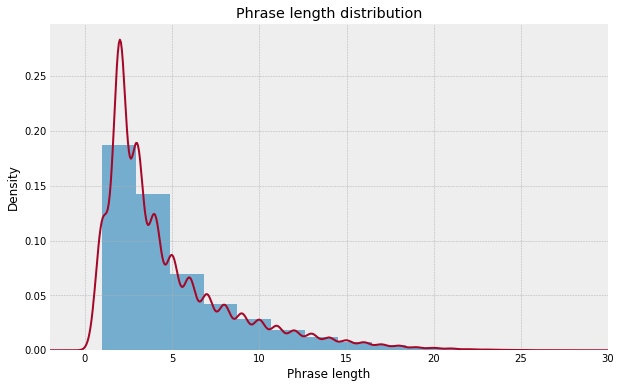

In [70]:
plot_text_length(df['phrase_clean'], title='Phrase length distribution')

count    32695.000000
mean         5.548708
std          4.120910
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         29.000000
Name: phrase_clean, dtype: float64


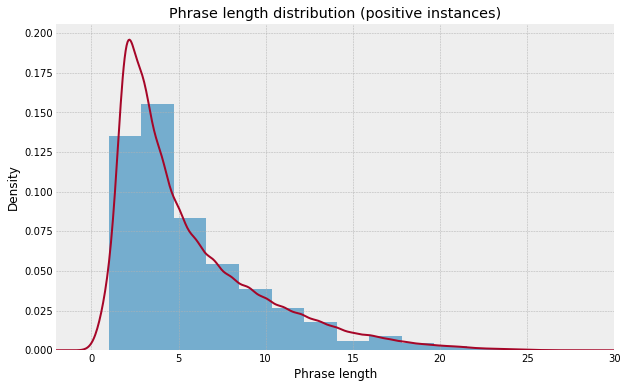

In [71]:
# Positive sentences
plot_text_length(df[df['label_id'] > 3]['phrase_clean'], title='Phrase length distribution (positive instances)')

count    27201.000000
mean         5.845300
std          4.198008
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         30.000000
Name: phrase_clean, dtype: float64


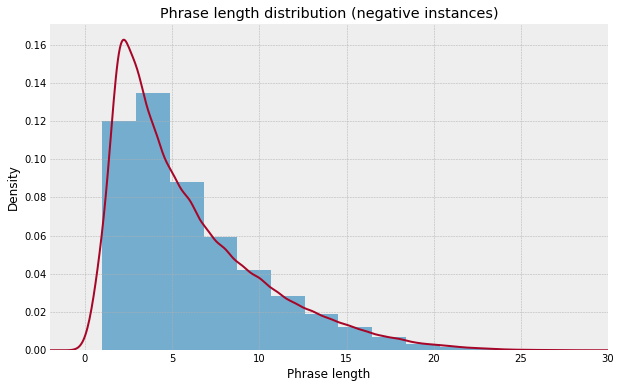

In [72]:
# Negative sentences
plot_text_length(df[df['label_id'] < 3]['phrase_clean'], title='Phrase length distribution (negative instances)')

# Word Count

In [73]:
df['word_count'] = df['phrase_clean'].apply(lambda x: len(str(x).split()))

word_stats = df.groupby('label')['word_count']
word_stats.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
Negative,21549.0,5.557752,4.069264,1.0,2.0,4.0,7.0,29.0
Neutral,53128.0,3.577360,3.024175,1.0,2.0,3.0,4.0,26.0
Positive,24929.0,5.258454,3.980818,1.0,2.0,4.0,7.0,29.0
Very negative,5652.0,6.941614,4.490828,1.0,3.0,6.0,10.0,30.0
Very positive,7766.0,6.480428,4.414641,1.0,3.0,5.0,9.0,26.0


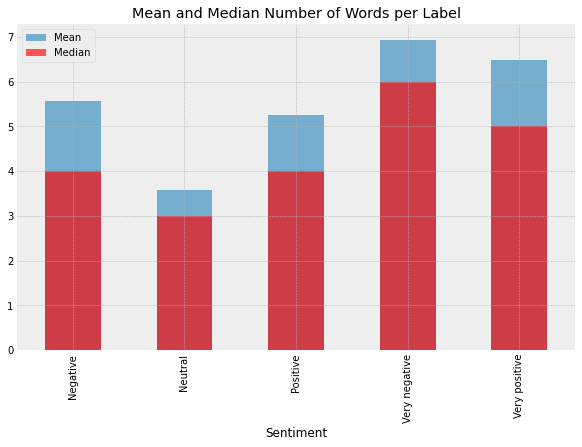

In [76]:
plot_stats(word_stats, xlabel='Sentiment', ylabel='', title='Mean and Median Number of Words per Label')

# Punctuation Count

In [78]:
import string

In [79]:
df['punct_count'] = df['phrase'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))

In [80]:
punct_stats = df.groupby('label')['punct_count']
punct_stats.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
Negative,21549.0,1.285721,1.811517,0.0,0.0,1.0,2.0,21.0
Neutral,53128.0,0.718378,1.353262,0.0,0.0,0.0,1.0,23.0
Positive,24929.0,1.140639,1.697249,0.0,0.0,0.0,2.0,17.0
Very negative,5652.0,1.863588,2.219978,0.0,0.0,1.0,3.0,22.0
Very positive,7766.0,1.559233,1.960730,0.0,0.0,1.0,2.0,18.0


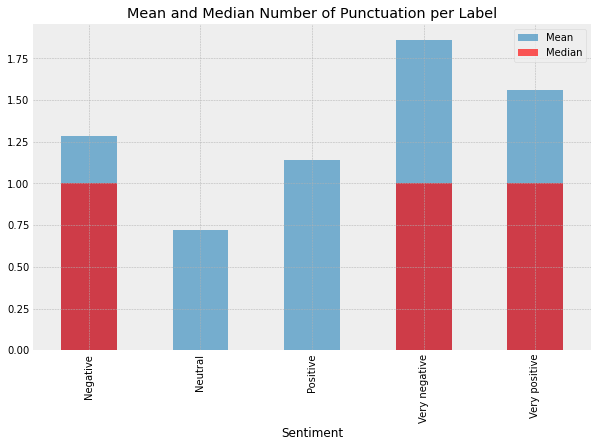

In [84]:
plot_stats(punct_stats, xlabel='Sentiment', ylabel='', title='Mean and Median Number of Punctuation per Label')

- Punctuation occurs more often in in the extreme sentiments.
- Could be a good feature to include in classification to discriminate classes from each other.

# Upper case letter count

In [82]:
df['num_caps'] = df['phrase_clean'].apply(lambda x: sum(1 for c in x if c.isupper()))

In [83]:
numcap_stats = df.groupby('label')['punct_count']
numcap_stats.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
Negative,21549.0,1.285721,1.811517,0.0,0.0,1.0,2.0,21.0
Neutral,53128.0,0.718378,1.353262,0.0,0.0,0.0,1.0,23.0
Positive,24929.0,1.140639,1.697249,0.0,0.0,0.0,2.0,17.0
Very negative,5652.0,1.863588,2.219978,0.0,0.0,1.0,3.0,22.0
Very positive,7766.0,1.559233,1.960730,0.0,0.0,1.0,2.0,18.0


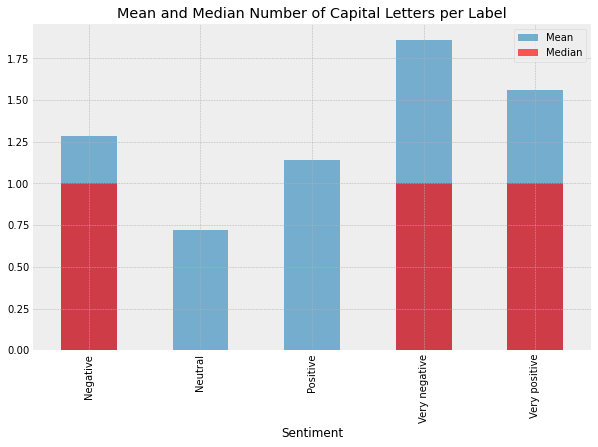

In [86]:
plot_stats(numcap_stats, xlabel='Sentiment', ylabel='', title='Mean and Median Number of Capital Letters per Label')

- Capital letters occur more often in in the extreme sentiments.
- Could be a good feature to include in classification to discriminate classes from each other, as well.

# POS Tag Counts

In [93]:
from textblob import TextBlob

In [94]:
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

In [95]:
df['noun_count'] = df['phrase_clean'].apply(lambda x: pos_check(x, 'noun'))
df['verb_count'] = df['phrase_clean'].apply(lambda x: pos_check(x, 'verb'))
df['adj_count'] = df['phrase_clean'].apply(lambda x: pos_check(x, 'adj'))
df['adv_count'] = df['phrase_clean'].apply(lambda x: pos_check(x, 'adv'))
df['pron_count'] = df['phrase_clean'].apply(lambda x: pos_check(x, 'pron'))

In [107]:
noun_stats = df.groupby('label')['noun_count']
verb_stats = df.groupby('label')['verb_count']
adj_stats = df.groupby('label')['adj_count']
adv_stats = df.groupby('label')['adv_count']
pron_stats = df.groupby('label')['pron_count']

adj_stats.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
Negative,21549.0,1.022228,1.181590,0.0,0.0,1.0,2.0,10.0
Neutral,53128.0,0.570114,0.901650,0.0,0.0,0.0,1.0,9.0
Positive,24929.0,0.993141,1.167596,0.0,0.0,1.0,1.0,9.0
Very negative,5652.0,1.331210,1.293708,0.0,0.0,1.0,2.0,7.0
Very positive,7766.0,1.260108,1.317404,0.0,0.0,1.0,2.0,10.0


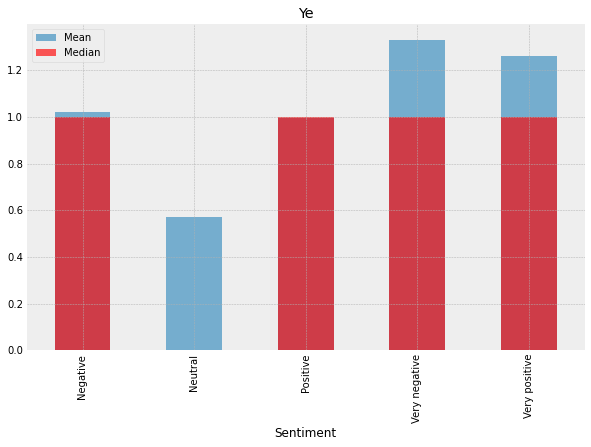

In [103]:
plot_stats(adj_stats, xlabel='Sentiment', ylabel='', title='Ye')

- The use of adjectives is a lot more common for phrases that express a sentiment. 
- May be a useful feature.

In [108]:
df.head()

,phrase_id,phrase,phrase_clean,sentiment_val,label_id,label,word_count,punct_count,num_caps,upper_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
69650,72419,a skyscraper,skyscrap,0.61111,4.0,Positive,1,0,0,0,1,0,0,0,0
62909,3598,a bolly-holly masala,bolli holli masala,0.41667,3.0,Neutral,3,1,0,0,3,0,0,0,0
115153,120298,focuses too much on Max when he should be fill...,focus much max fill screen tortur dull artist ...,0.31944,2.0,Negative,10,4,0,0,5,1,3,1,0
128282,32640,honestly nice,honestli nice,0.80556,5.0,Very positive,2,0,0,0,2,0,0,0,0
66944,190895,a lower I . Q,lower q,0.30556,2.0,Negative,2,1,0,0,1,0,1,0,0
